# Concentration Inequality

## Gaussian Measure Concentration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Find Transformation $F$

Take $F(x_1,...,x_n) = c\cdot x$ so we know that $\forall n,\mathbb{E} F(X_1,...,X_n)=0$

Moreover, $F$ is Lipschitz continuous with Lipschitz constant $L = ||c||_2$

In [83]:
# Define function F
n = 10000 # Sample size
c = np.random.normal(size = n)
L = np.sqrt(np.sum(c ** 2))
def F(x):
    # Input x is an array
    return np.dot(c,x)

## Calculate Probability by Monte Carlo

In [84]:
iter_num = 100 # Iteration number in Monte Carlo
a_value = np.linspace(0.01,1000,1000) # All possible values of a

##  Monte Carlo Loop

In [85]:
# Use a list to store the probabilities for each a
a_prob_list = list()

# For each fixed value of a
for a in a_value:
    # In each Monte Carlo iteration
    count = 0 # Count how many times the event happens
    for ind in range(iter_num):
        # Sample Gaussian random variables
        sample = np.random.normal(size = n)
    
        # Calculate the value of F(sample)
        sample_F = F(sample)
        
        # If F(sample)>= a, then count plus one
        if sample_F >= a:
            count = count + 1
            
    # Get the estimation of the probability
    prob = (count + 0.0) / iter_num
    
    # Append this probability into the list
    a_prob_list.append(prob)

##  Create plot of the empirical probability and the concentration bound

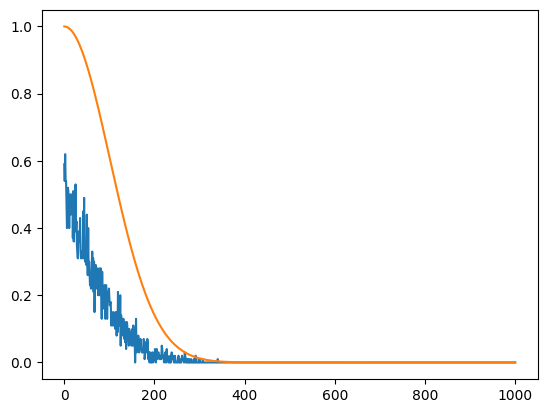

In [86]:
# Empirical Probability
plt.plot(a_value,a_prob_list)

# Concentration Bound
plt.plot(a_value,np.exp(-1/(2 * L **2) * (a_value ** 2)))

# Simple Symmetric Random Walk

## Law of iterated Logarithm

$\limsup_{n\to\infty}\frac{S_n}{\sqrt{2n\log\log n}} = 1\ a.s.,\liminf_{n\to\infty}\frac{S_n}{-\sqrt{2n\log\log n}} = 1\ a.s.$

## Simulate one trajectory of SRW

In [3]:
time_limit = 100000 # Simulate till this time
SRW_increments = 2 * np.random.randint(2,size = time_limit) - np.ones(time_limit)
SRW_sample = [np.sum(SRW_increments[:n]) for n in range(len(SRW_increments))]

## Plot this trajectory and the theoretical bound

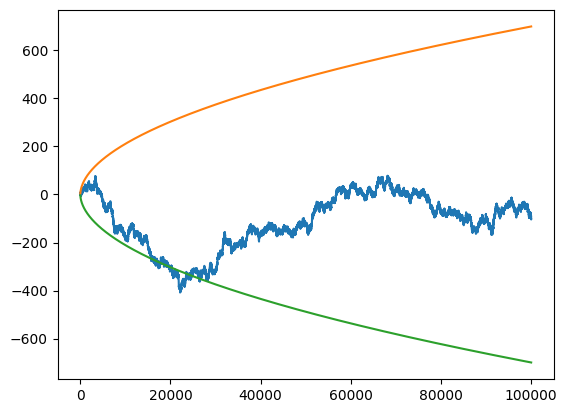

In [4]:
# Plot this trajectory and the bound
plot_time = np.array(range(time_limit))
plt.plot(plot_time,SRW_sample)
plt.plot(plot_time[10:],np.sqrt(2 * plot_time[10:] * np.log(np.log(plot_time[10:]))))
plt.plot(plot_time[10:],-np.sqrt(2 * plot_time[10:] * np.log(np.log(plot_time[10:]))))

## Repeatedly doing simulations

Also plot the concentration bound of SRW by Azuma's inequality that $\mathbb{P}\left(S_n\geq \sqrt{2n\log n + 4n\log\log n}\right)\leq \frac{1}{n\log^2 n}$

By Borel-Cantelli, $\mathbb{P}\left(S_n\geq \sqrt{2n\log n + 4n\log\log n}\ i.o.\right)=0$

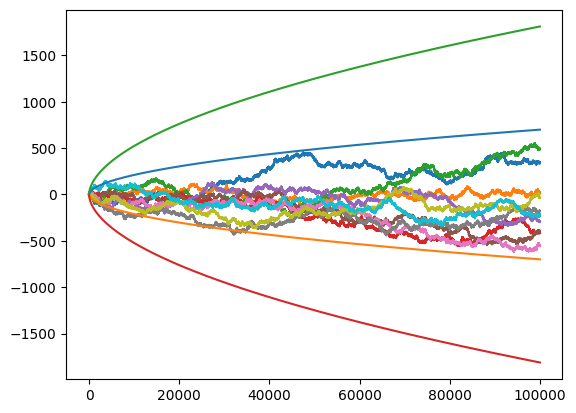

In [112]:
num_simu = 10
plot_time = np.array(range(time_limit))
for _ in range(num_simu):
    SRW_increments = 2 * np.random.randint(2,size = time_limit) - np.ones(time_limit)
    SRW_sample = [np.sum(SRW_increments[:n]) for n in range(len(SRW_increments))]
    # Plot this trajectory and the bound
    plt.plot(plot_time,SRW_sample)
plt.plot(plot_time[10:],np.sqrt(2 * plot_time[10:] * np.log(np.log(plot_time[10:]))))
plt.plot(plot_time[10:],-np.sqrt(2 * plot_time[10:] * np.log(np.log(plot_time[10:]))))
plt.plot(plot_time[10:],np.sqrt(2 * plot_time[10:] * np.log(plot_time[10:]) + 4 * plot_time[10:] * np.log(np.log(plot_time[10:]))))
plt.plot(plot_time[10:],-np.sqrt(2 * plot_time[10:] * np.log(plot_time[10:]) + 4 * plot_time[10:] * np.log(np.log(plot_time[10:]))))